In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-eda/zomato.csv


In [2]:
df=pd.read_csv('/kaggle/input/zomato-eda/zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


read the csv file and open the data set.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In this dataset 17 columns are there, some columns include NaN values,incorrect data types.

In [4]:
# Deleting redundant columns.
df.drop(columns=['url','address','phone','menu_item','dish_liked','reviews_list','listed_in(city)'],axis=1,inplace=True)
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet
...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,Continental,"1,500",Pubs and bars
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,Finger Food,600,Pubs and bars
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,Finger Food,"2,000",Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",Pubs and bars


Drop Unnecessary Columns: drop those columns which are not necessary for analysis eg: 'url' by this column we cannot predict anything.

In [5]:
# Renaming the columns.
df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type'},inplace=True)
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,type
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet
...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,Continental,"1,500",Pubs and bars
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,Finger Food,600,Pubs and bars
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,Finger Food,"2,000",Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",Pubs and bars


Rename the columns  names of columns for better understanding.

In [6]:
# Dropping duplicates.
df.drop_duplicates(inplace=True)
df


,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,type
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet
...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,Continental,"1,500",Pubs and bars
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,Finger Food,600,Pubs and bars
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,Finger Food,"2,000",Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",Pubs and bars


using the drop duplicate  function to remove duplicate rows from the DataFrame. By default, this function considers all columns to identify duplicates in the data.

In [7]:
# Cleaning individual columns.
df['rate'].replace('NEW', 0, inplace=True)
df['rate'].replace('-', 0, inplace=True)
df['rate'] = df['rate'].str.rstrip('/5').astype(float)
df



,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet
...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,Continental,"1,500",Pubs and bars
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,Finger Food,600,Pubs and bars
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,Finger Food,"2,000",Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",Pubs and bars


Here we can see rating column having string values and having object datatype including 'NEW' and '-' values. we know that rating is always out of 5 and in decimal format. So, we need to clean our 'ratings' column.

In [8]:
# Remove the NaN values from the dataset
df = df.dropna()
df


,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet
...,...,...,...,...,...,...,...,...,...,...
51709,The Farm House Bar n Grill,No,No,3.7,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800,Pubs and bars
51711,Bhagini,No,No,2.5,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800,Pubs and bars
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,Continental,"1,500",Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",Pubs and bars


remove the NaN values from the dataset is use .dropna() is a DataFrame method used to remove rows or columns with NaN values.

In [9]:
# Check for some more Transformations
df['cost']=df['cost'].str.replace(',','.').astype(float)
df.head()

/tmp/ipykernel_20/1883627919.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cost']=df['cost'].str.replace(',','.').astype(float)


,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


Check for some more Transformations in the data replace the cost values (, )by(.)using str.replace.

importing all libraries for data visualization

<Axes: xlabel='online_order', ylabel='count'>

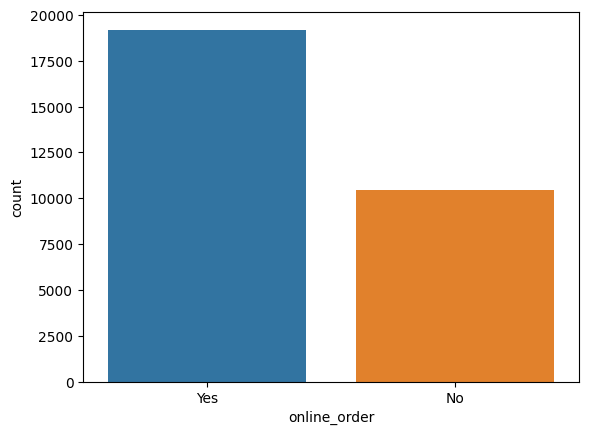

In [10]:
# Restaurants delivering Online or not
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='online_order', data=df)

looking at the plot we conclude that around 30k restaurants gives online order facility

<Axes: xlabel='book_table', ylabel='count'>

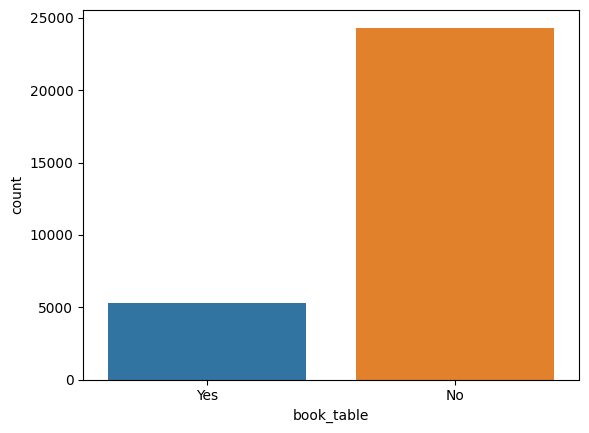

In [11]:
# Restaurants allowing table booking or not
sns.countplot(x='book_table',data=df)

more than 25 restaurants allow table booking

In [12]:
# Table booking Rate vs Rate

dfz=df.groupby('book_table').agg({'rate':'mean'})
dfz

,rate
book_table,
No,3.617382
Yes,4.148570


<Axes: ylabel='book_table'>

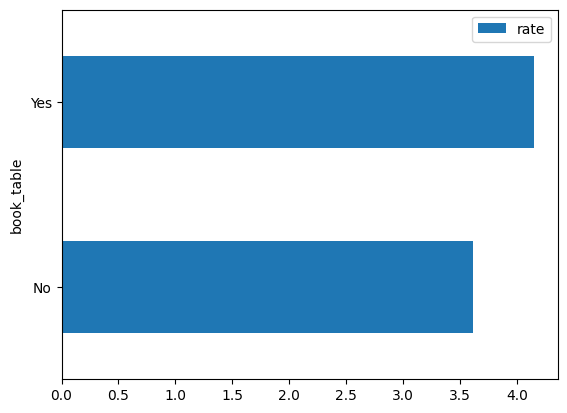

In [13]:

dfz.plot(kind='barh',use_index=True)

use groupby because there are so many unique values in ratings column. By plot restaurants that have book table facility rated more than those which don't have book table option.

<Axes: title={'center': 'Best Location'}, xlabel='location'>

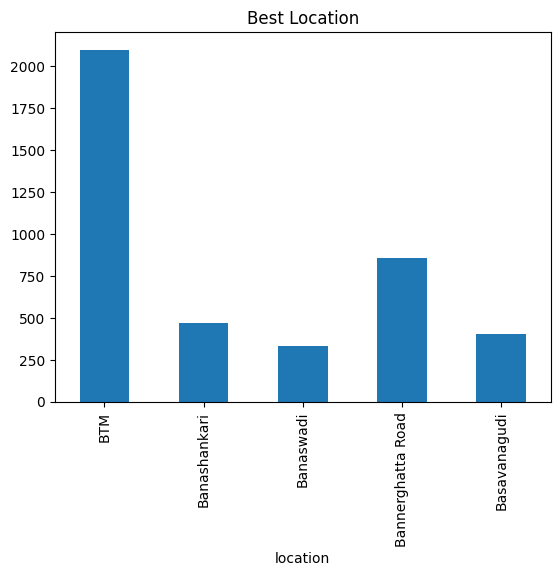

In [14]:
# Best Location
df3=df.groupby(['location'])['rate'].count().head()
df3.plot(kind='bar',title='Best Location')

this plot shows that BTM is best location for having food..

In [15]:
# Relation between Location and Rating.
df4=df.groupby('location').agg({'rate':'mean'})
df4.head()

,rate
location,
BTM,3.592905
Banashankari,3.630426
Banaswadi,3.469697
Bannerghatta Road,3.516414
Basavanagudi,3.653846


<Axes: ylabel='location'>

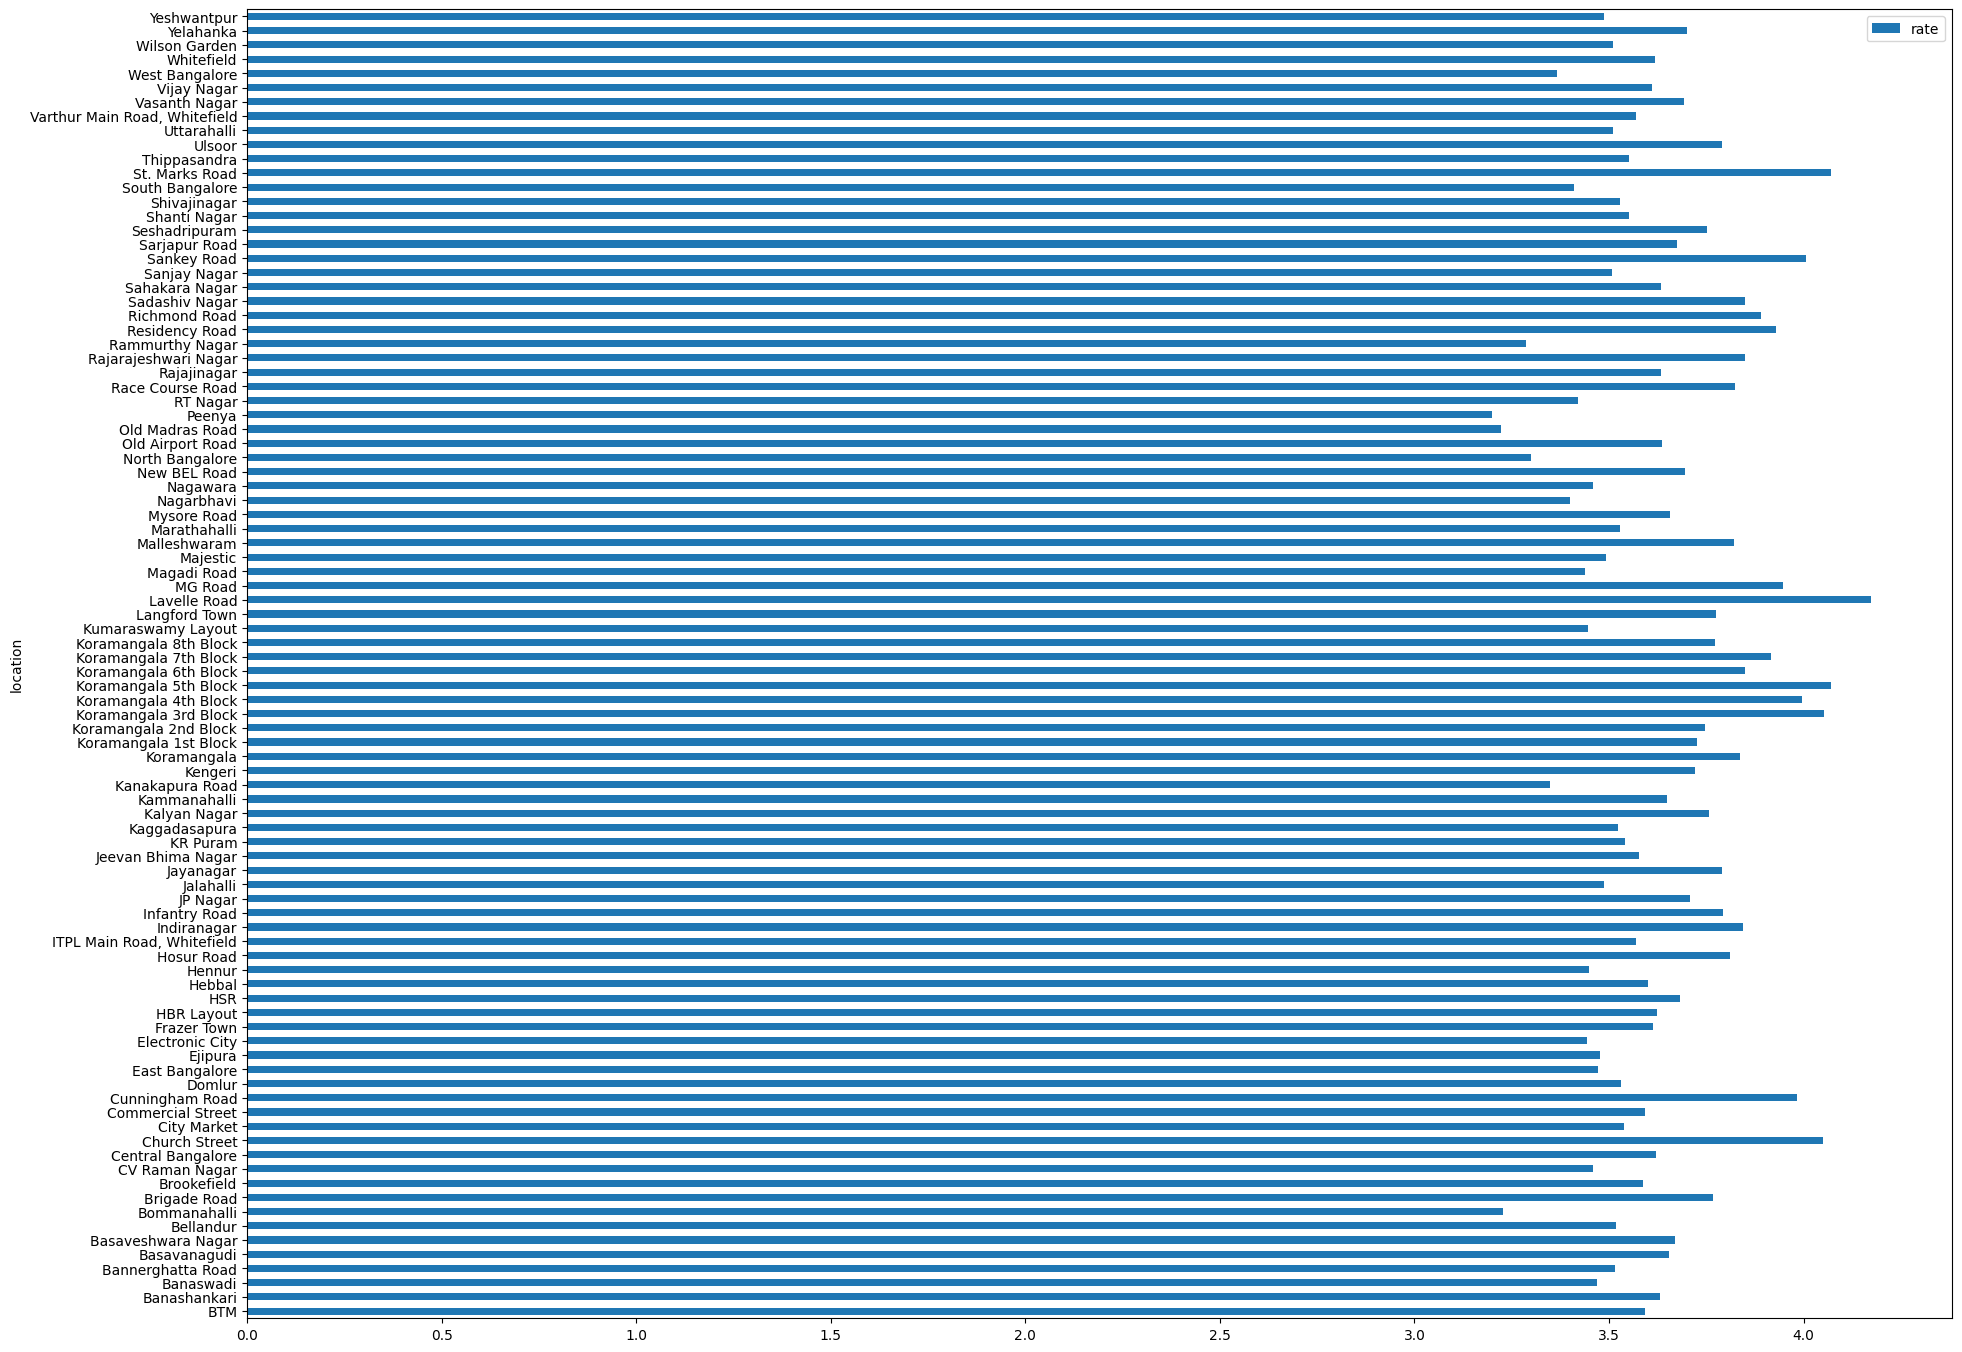

In [16]:
df4.plot(kind='barh',use_index=True,figsize=(22,17))

the  plot church street have high votes so if we consider votes church street is best location

Restaurant Type

<Axes: title={'center': 'rest type'}, xlabel='rest_type'>

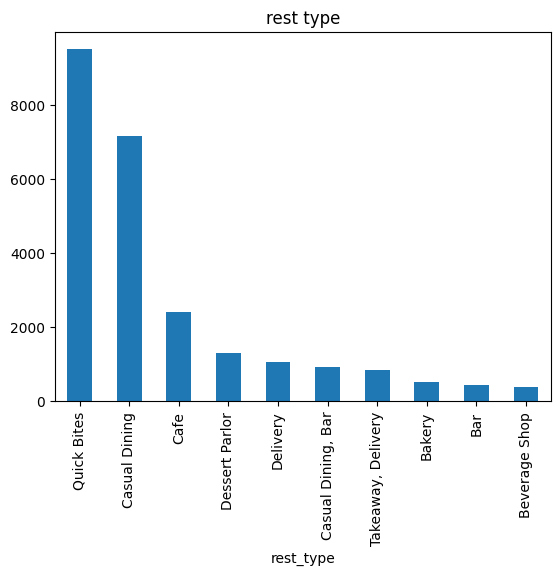

In [17]:
df5=df['rest_type'].value_counts().head(10)
df5.plot(kind='bar',title='rest type')

by this plot most of the restaurants are type of Quick Bites & Casual dining

<Axes: title={'center': 'Gaussian Rest type and Rating'}, xlabel='cuisines'>

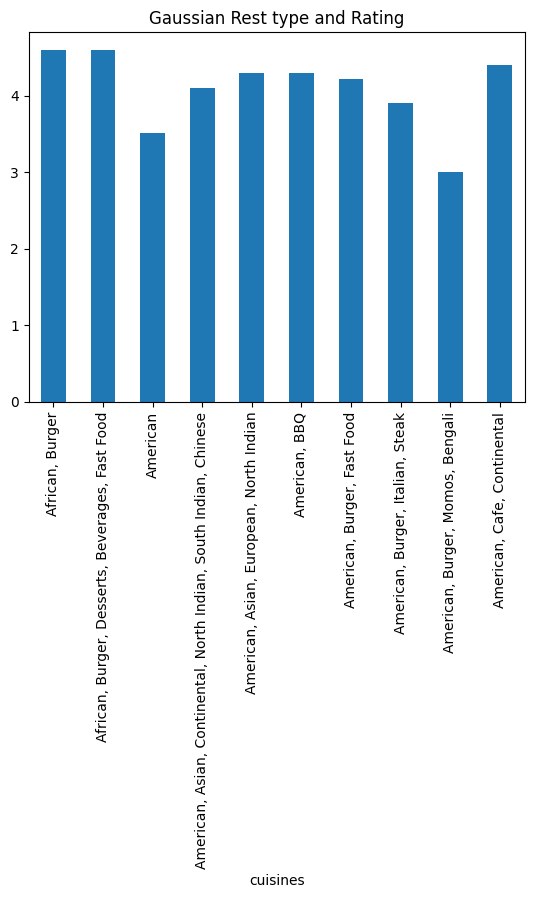

In [18]:
# Gaussian Rest type and Rating
df6=df.groupby(['cuisines'])['rate'].mean().head(10)
df6.plot(kind='bar',title='Gaussian Rest type and Rating')

This plot shows that most of the rest_type rated more than 4.

<Axes: title={'center': 'Types of Services'}, xlabel='type'>

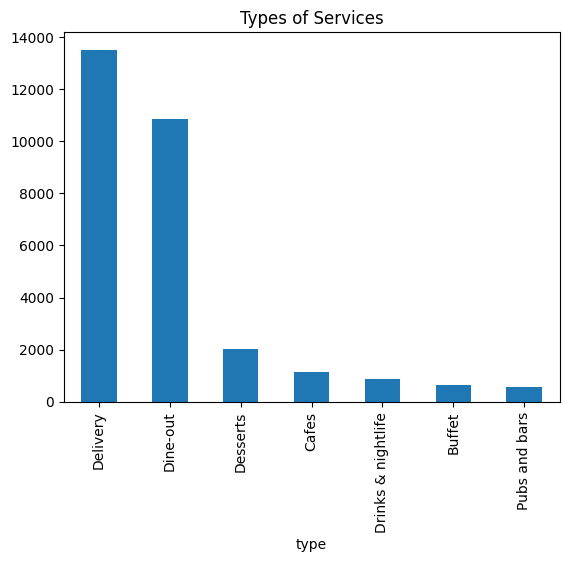

In [19]:
# Types of Services
df7=df['type'].value_counts()
df7.plot(kind='bar',title='Types of Services')

Delivery types of restaurants are near to 13k and around 14k are Dine-Out Type

<Axes: title={'center': 'Relation between Type and Rating'}, xlabel='type'>

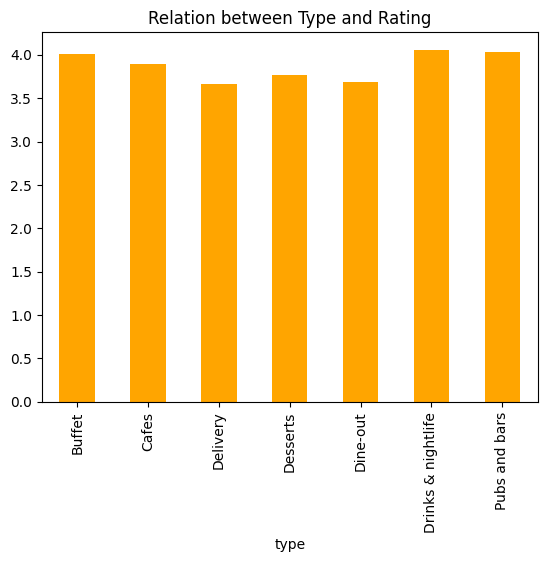

In [20]:
# Relation between Type and Rating
df8=df.groupby([('type')])['rate'].mean().head(10)
df8.plot(kind='bar',title='Relation between Type and Rating',color='orange')

Buffet, Drinks & Nightlife and Pubs & Bars Types of restaurants are rated high than other types.

<Axes: title={'center': 'Cost of Restaurant'}, xlabel='name'>

/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 131 (\x83) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 130 (\x82) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 146 (\x92) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


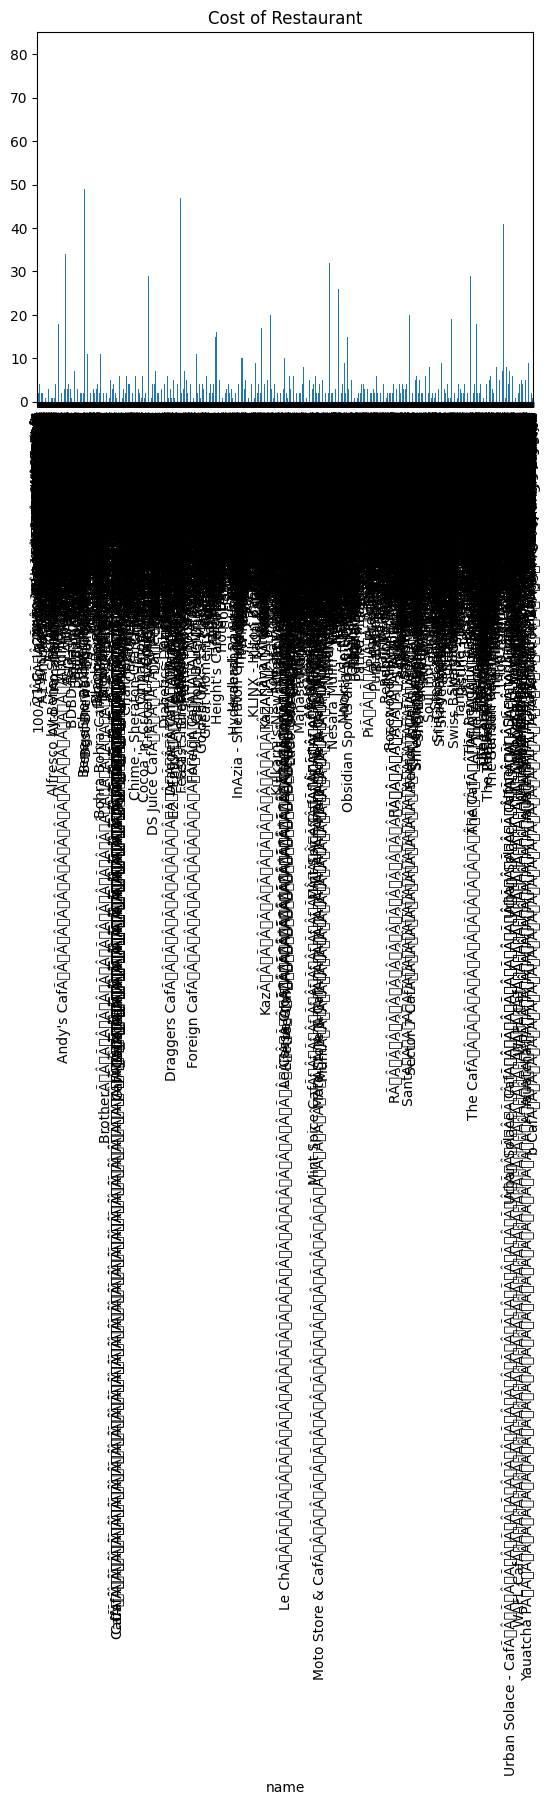

In [21]:
# Cost of Restaurant
dfc=df.groupby(['name'])['cost'].count()
dfc.plot(kind='bar',title='Cost of Restaurant')

Le Cirque Signature-The Leela Palace is the most expensive restaurant in the city with Rs 3000 for two person.

<Axes: xlabel='count', ylabel='location'>

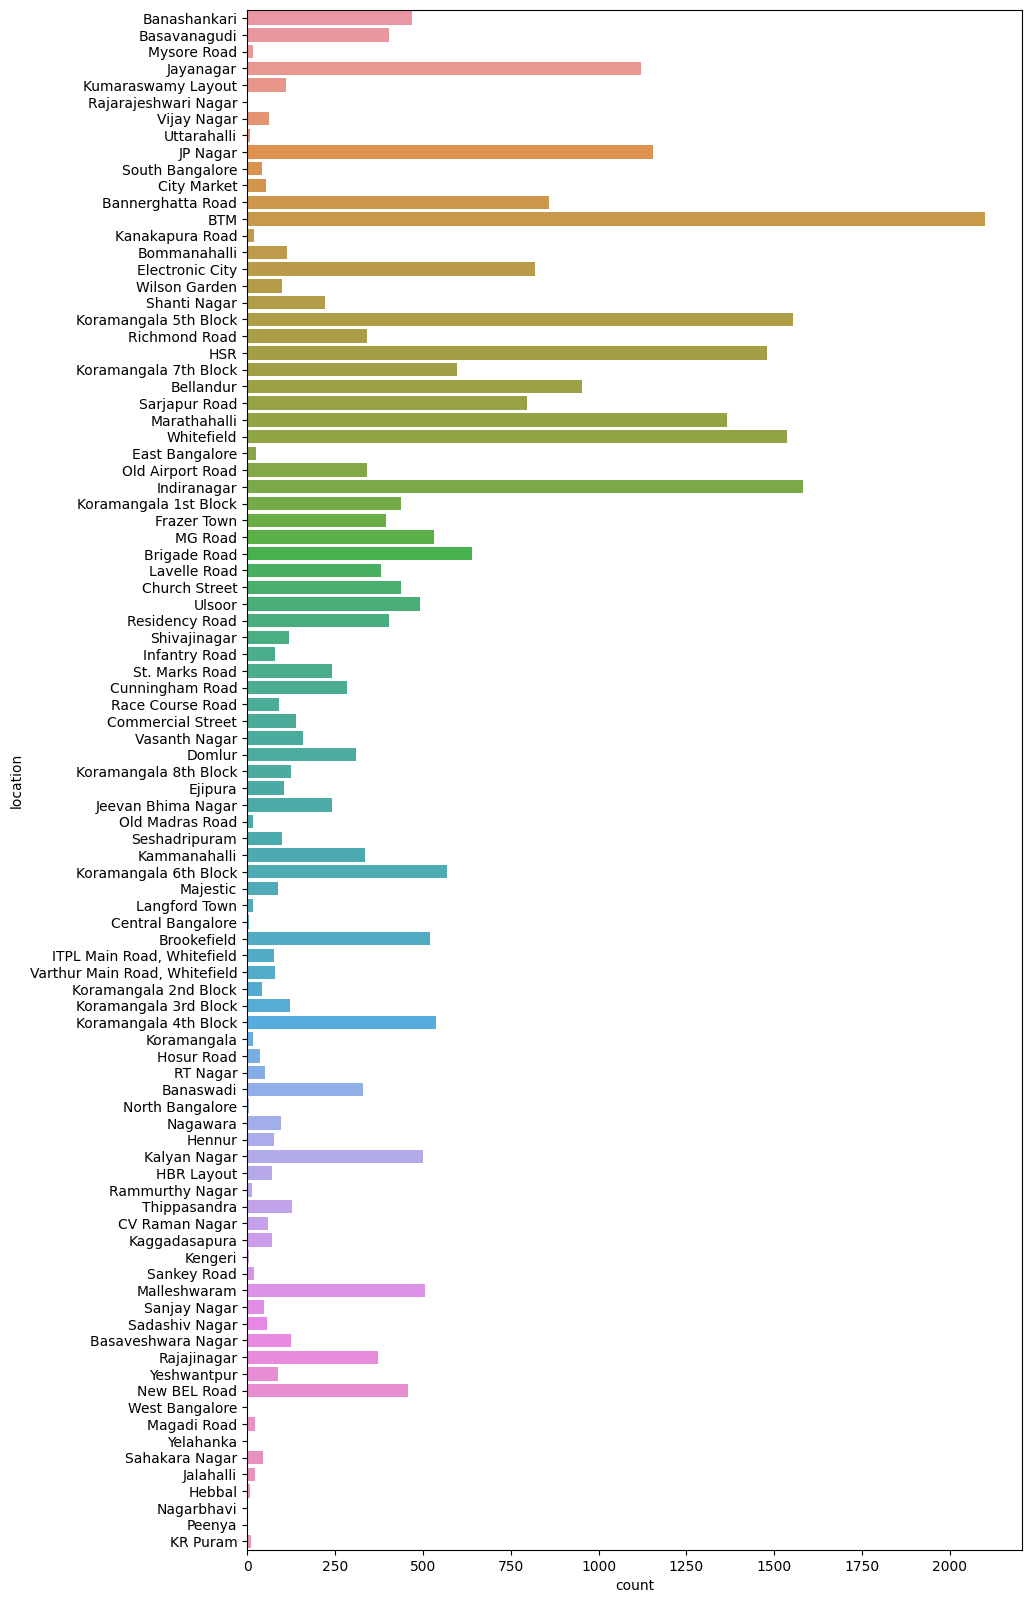

In [22]:
fig = plt.figure(figsize =(10,20))
ax1 = fig.add_subplot(1,1,1)
sns.countplot(y = df['location'], ax = ax1)


IN this plot BTM location has more restaurants in the city.

<Axes: title={'center': 'Restaurant type'}, ylabel='rest_type'>

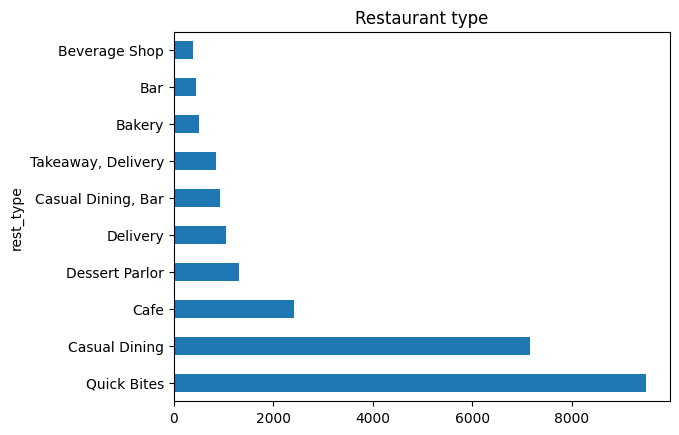

In [23]:
# Restaurant type

dfr=df['rest_type'].value_counts().head(10)
dfr.plot(kind='barh',title='Restaurant type')

<Axes: title={'center': 'Most famous restaurant chains in Bengaluru'}, xlabel='name'>

/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 131 (\x83) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 130 (\x82) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


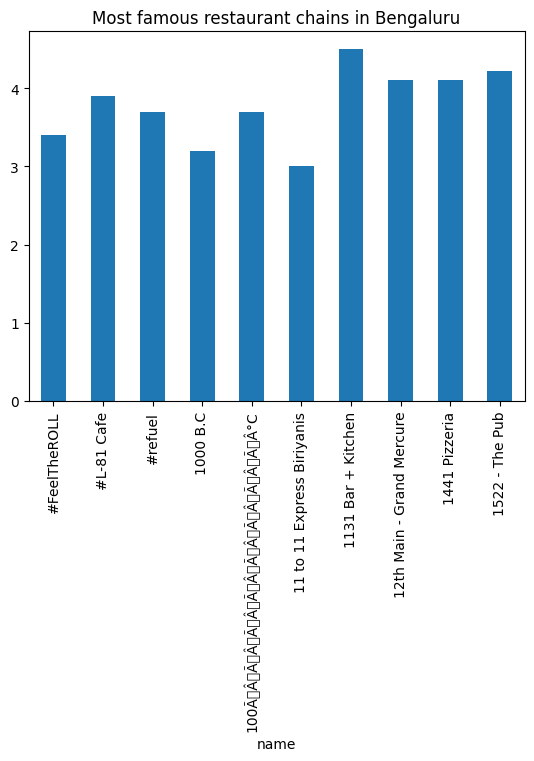

In [24]:
# Most famous restaurant chains in Bengaluru
dfmf=df.groupby(['name'])['rate'].mean().head(10)
dfmf.plot(kind='bar',title='Most famous restaurant chains in Bengaluru')

IN this plot famous restaurant chains in Bengaluru display .